In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#rest for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-300-asian-universities-qs-rankings-2024/topuniversities.xlsx
/kaggle/input/top-300-asian-universities-qs-rankings-2024/topuniversities.csv


## *Loading Dataset*

In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/top-300-asian-universities-qs-rankings-2024/topuniversities.csv')

# Check the first few rows of the dataset
df.head()

,Rank,Ordinal Rank,University Name,Overall Score,City,Country,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
0,1,1,Peking University,100.0,Beijing,China,96.4,79.8,100.0,98.6,90.7,98.0,69.1,100.0,88.5,83.2,100.0
1,2,2,The University of Hong Kong,99.7,Pokfulam,Hong Kong,99.5,55.0,100.0,93.3,97.4,98.4,100.0,100.0,99.8,100.0,96.8
2,3,3,National University of Singapore (NUS),98.9,Singapore,Singapore,99.9,57.4,100.0,85.8,82.5,99.9,99.2,97.6,93.4,100.0,99.9
3,4,4,Nanyang Technological University,98.3,Singapore,Singapore,100.0,53.8,100.0,93.0,67.0,99.7,98.8,97.9,90.5,100.0,98.8
4,5,5,Fudan University,97.2,Shanghai,China,92.1,63.1,99.8,92.5,73.4,92.1,81.0,94.9,99.5,98.9,99.5


## *Understanding the Data*

In [3]:
#Rows and Columns
df.shape

(300, 17)

In [4]:
#Column name
df.columns

Index(['Rank', 'Ordinal Rank', 'University Name', 'Overall Score', 'City',
       'Country', 'Citations per Paper', 'Papers per Faculty',
       'Academic Reputation', 'Faculty Student Ratio', 'Staff with PhD',
       'International Research Center', 'International Students',
       'Outbound Exchange', 'Inbound Exchange', 'International Faculty',
       'Employer Reputation'],
      dtype='object')

In [5]:
# Examine data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rank                           300 non-null    int64  
 1   Ordinal Rank                   300 non-null    int64  
 2   University Name                300 non-null    object 
 3   Overall Score                  300 non-null    float64
 4   City                           300 non-null    object 
 5   Country                        300 non-null    object 
 6   Citations per Paper            300 non-null    float64
 7   Papers per Faculty             300 non-null    float64
 8   Academic Reputation            300 non-null    float64
 9   Faculty Student Ratio          300 non-null    float64
 10  Staff with PhD                 294 non-null    float64
 11  International Research Center  300 non-null    float64
 12  International Students         296 non-null    flo

In [6]:
# Summary of numeric columns
df.describe()

,Rank,Ordinal Rank,Overall Score,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,294.000000,300.000000,296.000000,300.000000,300.000000,283.000000,300.000000
mean,150.500000,150.133333,52.057667,44.869667,41.288667,51.648000,50.976333,53.959524,60.108333,35.779054,38.573667,35.303667,38.437456,54.646000
std,86.746758,86.556739,19.123336,34.088756,29.994062,26.305925,31.338651,35.002787,31.179020,31.477270,34.467015,36.086228,30.571068,29.915534
min,1.000000,1.000000,29.000000,1.000000,1.200000,8.800000,2.600000,1.000000,1.100000,1.300000,1.000000,1.000000,1.000000,4.100000
25%,75.750000,75.750000,35.850000,11.075000,14.500000,30.100000,21.750000,15.850000,33.475000,9.175000,8.300000,3.300000,12.800000,28.150000
50%,150.500000,150.500000,46.250000,39.050000,36.750000,45.150000,47.850000,62.300000,67.100000,23.950000,28.100000,20.100000,29.500000,53.050000
75%,225.250000,225.250000,62.725000,76.150000,61.775000,67.550000,80.300000,86.800000,88.675000,58.100000,62.925000,67.800000,56.850000,81.850000
max,300.000000,300.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


## *Handling missing values*

In [7]:
# Check for missing values
df.isnull().sum()

Rank                              0
Ordinal Rank                      0
University Name                   0
Overall Score                     0
City                              0
Country                           0
Citations per Paper               0
Papers per Faculty                0
Academic Reputation               0
Faculty Student Ratio             0
Staff with PhD                    6
International Research Center     0
International Students            4
Outbound Exchange                 0
Inbound Exchange                  0
International Faculty            17
Employer Reputation               0
dtype: int64

In [8]:
# Fill missing values
df['Staff with PhD'] = df['Staff with PhD'].fillna(df['Staff with PhD'].mean())
df['International Students'] = df['International Students'].fillna(df['International Students'].mean())
df['International Faculty'] = df['International Faculty'].fillna(df['International Faculty'].mean())

In [9]:
#Verifying missing values again
df.isnull().sum()

Rank                             0
Ordinal Rank                     0
University Name                  0
Overall Score                    0
City                             0
Country                          0
Citations per Paper              0
Papers per Faculty               0
Academic Reputation              0
Faculty Student Ratio            0
Staff with PhD                   0
International Research Center    0
International Students           0
Outbound Exchange                0
Inbound Exchange                 0
International Faculty            0
Employer Reputation              0
dtype: int64

## *Handling Duplicates*

In [10]:
# Check for duplicates and remove them
df = df.drop_duplicates()

## *Exploring Distribution of Data*

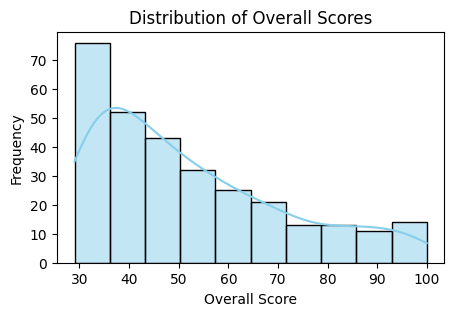

In [11]:
# Plotting the distribution of Overall Score
plt.figure(figsize=(5,3))
sns.histplot(df['Overall Score'], kde=True, color='skyblue')
plt.title('Distribution of Overall Scores')
plt.xlabel('Overall Score')
plt.ylabel('Frequency')
plt.show()

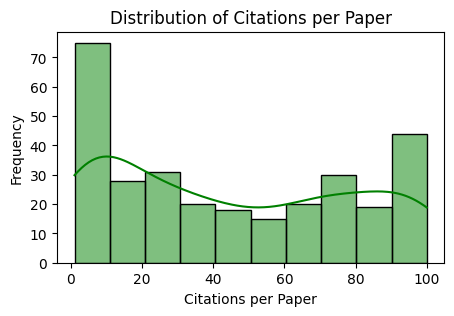

In [12]:
# Plotting the distribution of Citations per Paper
plt.figure(figsize=(5,3))
sns.histplot(df['Citations per Paper'], kde=True, color='green')
plt.title('Distribution of Citations per Paper')
plt.xlabel('Citations per Paper')
plt.ylabel('Frequency')
plt.show()


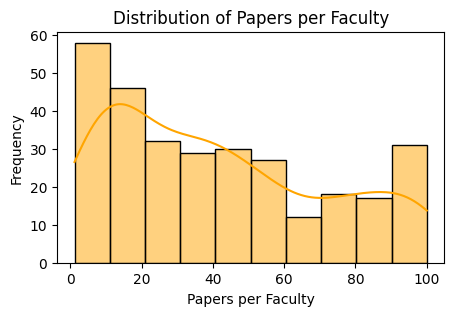

In [13]:
# Plotting the distribution of Papers per Faculty
plt.figure(figsize=(5,3))
sns.histplot(df['Papers per Faculty'], kde=True, color='orange')
plt.title('Distribution of Papers per Faculty')
plt.xlabel('Papers per Faculty')
plt.ylabel('Frequency')
plt.show()

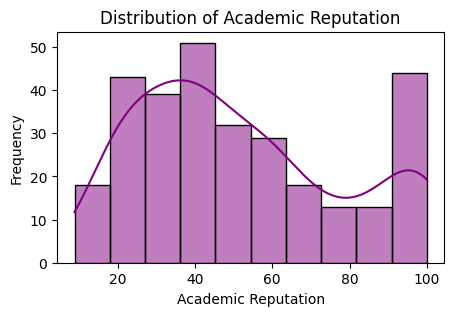

In [14]:
# Plotting the distribution of Academic Reputation
plt.figure(figsize=(5,3))
sns.histplot(df['Academic Reputation'], kde=True, color='purple')
plt.title('Distribution of Academic Reputation')
plt.xlabel('Academic Reputation')
plt.ylabel('Frequency')
plt.show()

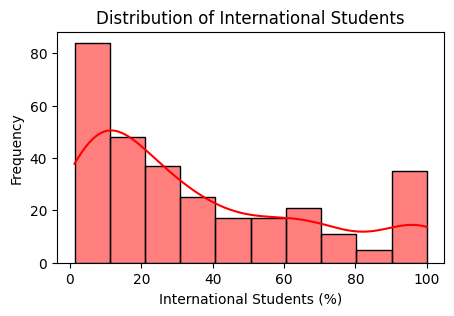

In [15]:
# Plotting the distribution of International Students
plt.figure(figsize=(5,3))
sns.histplot(df['International Students'], kde=True, color='red')
plt.title('Distribution of International Students')
plt.xlabel('International Students (%)')
plt.ylabel('Frequency')
plt.show()


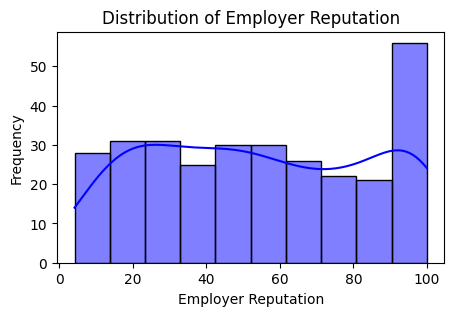

In [16]:
# Plotting the distribution of Employer Reputation
plt.figure(figsize=(5,3))
sns.histplot(df['Employer Reputation'], kde=True, color='blue')
plt.title('Distribution of Employer Reputation')
plt.xlabel('Employer Reputation')
plt.ylabel('Frequency')
plt.show()

## *Correlation Analysis*

In [17]:
# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,Rank,Ordinal Rank,Overall Score,Citations per Paper,Papers per Faculty,Academic Reputation,Faculty Student Ratio,Staff with PhD,International Research Center,International Students,Outbound Exchange,Inbound Exchange,International Faculty,Employer Reputation
Rank,1.000000,0.999968,-0.954643,-0.219652,-0.293990,-0.862827,-0.403355,-0.441482,-0.468019,-0.457608,-0.370927,-0.433121,-0.390572,-0.761246
Ordinal Rank,0.999968,1.000000,-0.954562,-0.219700,-0.293435,-0.862998,-0.403051,-0.441117,-0.468167,-0.457041,-0.370235,-0.432346,-0.390230,-0.761367
Overall Score,-0.954643,-0.954562,1.000000,0.268052,0.312004,0.896955,0.454798,0.451894,0.488723,0.510558,0.409723,0.469792,0.418109,0.763001
Citations per Paper,-0.219652,-0.219700,0.268052,1.000000,0.486041,-0.064392,0.004107,0.273403,0.452921,0.083282,0.175227,0.077214,0.041977,-0.143369
Papers per Faculty,-0.293990,-0.293435,0.312004,0.486041,1.000000,0.117506,-0.163080,0.554380,0.536401,-0.121010,-0.045673,-0.119361,-0.117198,-0.029458
Academic Reputation,-0.862827,-0.862998,0.896955,-0.064392,0.117506,1.000000,0.358035,0.294399,0.333821,0.388386,0.242586,0.332274,0.350398,0.793638
Faculty Student Ratio,-0.403355,-0.403051,0.454798,0.004107,-0.163080,0.358035,1.000000,0.108171,-0.097136,0.469128,0.435891,0.462519,0.344330,0.216891
Staff with PhD,-0.441482,-0.441117,0.451894,0.273403,0.554380,0.294399,0.108171,1.000000,0.317700,0.218742,0.136975,0.162582,0.058154,0.111121
International Research Center,-0.468019,-0.468167,0.488723,0.452921,0.536401,0.333821,-0.097136,0.317700,1.000000,-0.001781,-0.089033,-0.058656,-0.096486,0.129727
International Students,-0.457608,-0.457041,0.510558,0.083282,-0.121010,0.388386,0.469128,0.218742,-0.001781,1.000000,0.600509,0.642528,0.614981,0.328585


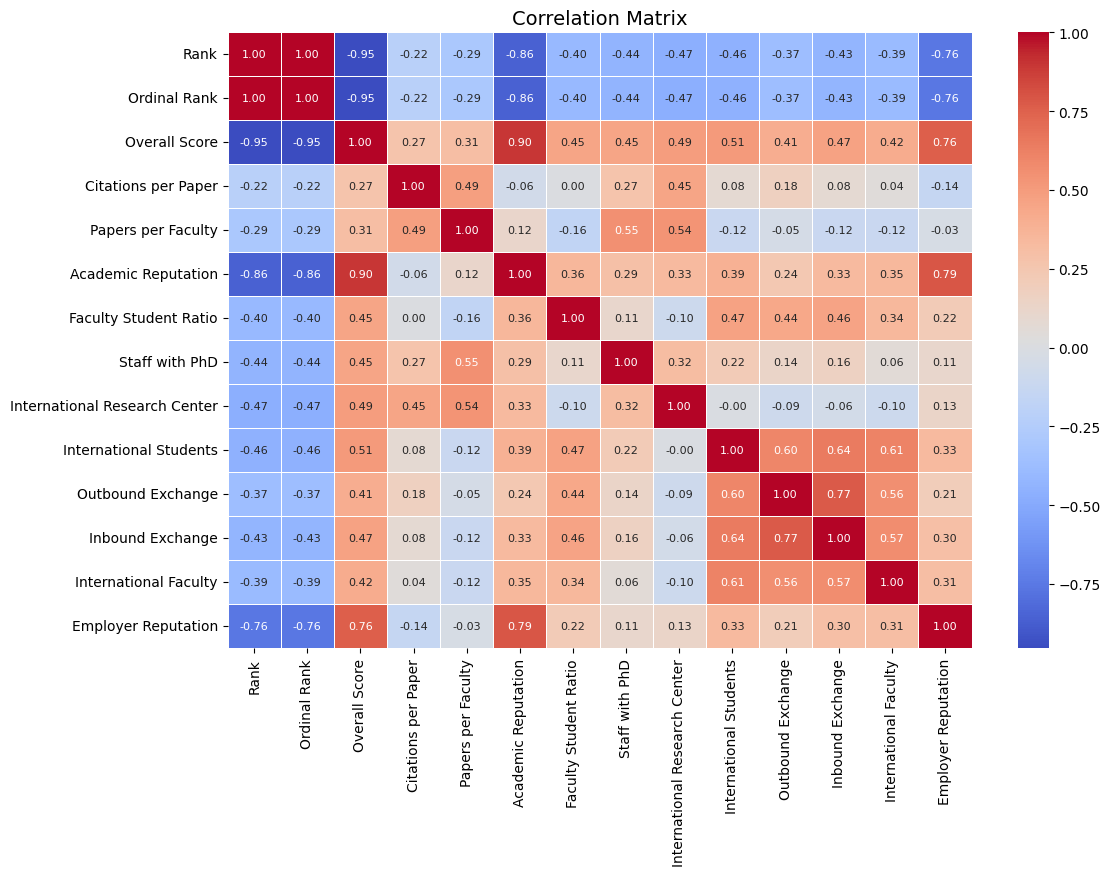

In [18]:
# Visualize correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 8}, linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix", fontsize=14)
plt.show()

## *Analyzing top Counteries*

In [19]:
# Count the number of universities per country
country_counts = df['Country'].value_counts()
country_counts

Country
China          62
India          41
South Korea    32
Japan          27
Malaysia       25
Taiwan         18
Pakistan       14
Kazakhstan     13
Indonesia      13
Iran           10
Thailand        9
Hong Kong       8
Bangladesh      6
Philippines     4
Singapore       4
Vietnam         4
Kyrgystan       3
Brunei          2
Macau SAR       2
Uzbekistan      2
Sri Lanka       1
Name: count, dtype: int64

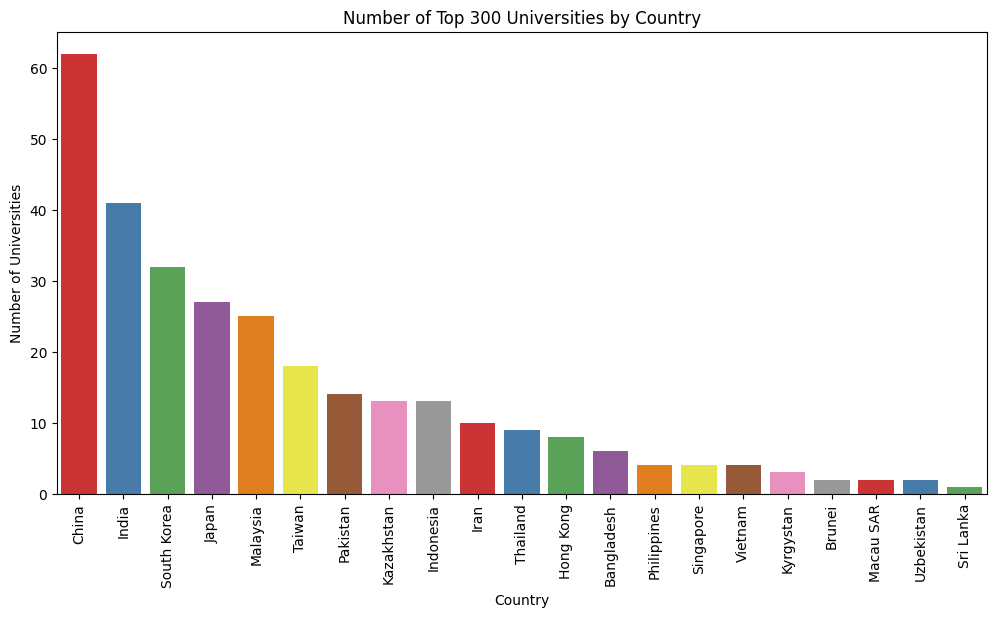

In [20]:
# Number of universities per country
plt.figure(figsize=(12,6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='Set1')
plt.xticks(rotation=90)
plt.title('Number of Top 300 Universities by Country')
plt.xlabel('Country')
plt.ylabel('Number of Universities')

plt.show()

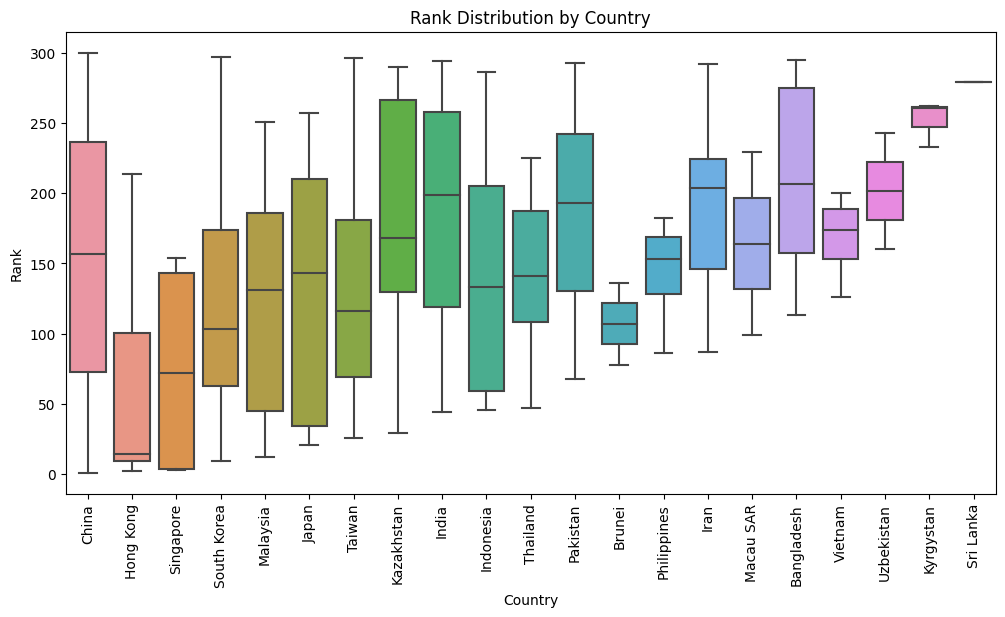

In [21]:
# Plotting rank distribution across countries
plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='Rank', data=df)
plt.xticks(rotation=90)
plt.title('Rank Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Rank')
plt.show()

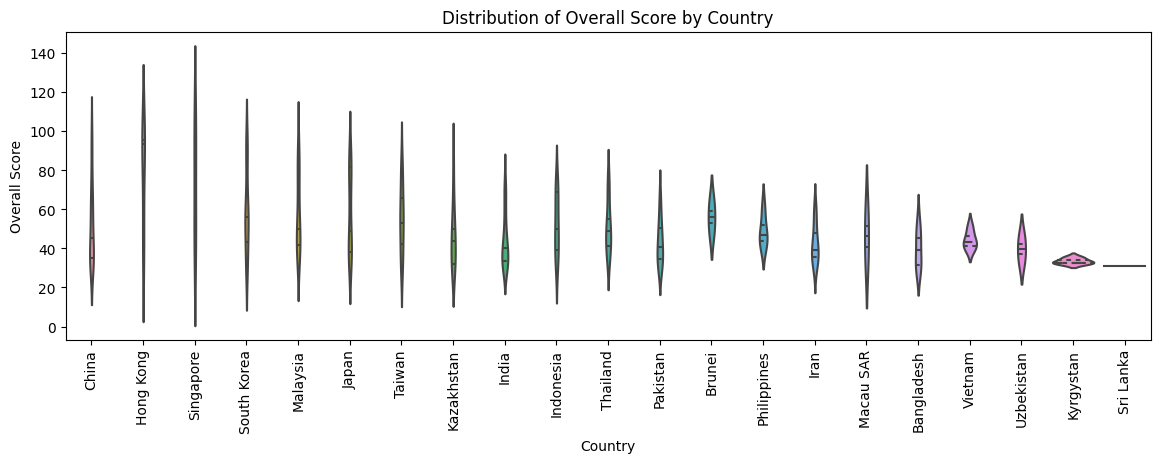

In [22]:
# Violin plot for Overall Score by Country
plt.figure(figsize=(14,4))
sns.violinplot(x='Country', y='Overall Score', data=df, inner='quart')
plt.xticks(rotation=90)
plt.title('Distribution of Overall Score by Country')
plt.xlabel('Country')
plt.ylabel('Overall Score')
plt.show()

## *Analyzing Relationships*

In [ ]:
# Select numeric columns only
numeric_columns = df.select_dtypes(include=['float64']).columns

# Create the pair plot
sns.pairplot(df[numeric_columns])
plt.suptitle("Pairwise Relationships Between Numeric Columns", y=1.02)
plt.show()

## *Feature Engineering*

In [ ]:
#research impact of universities. 
df['Research Impact'] = round((df['Citations per Paper'] * df['Papers per Faculty']) / 100, 2)
df.head() 

In [ ]:
# Rank of universities
df['Rank Category'] = pd.cut(df['Overall Score'], bins=[0, 50, 75, 100], labels=['Low', 'Medium', 'High'])
df.head()

In [ ]:
# Internationalization factor
df['Internationalization'] = round((df['International Research Center'] * df['International Students'] * df['International Faculty']) / 10000 , 2)
df.head()

In [ ]:
# University impact
df['University Strength'] = round((df['Academic Reputation'] * df['Employer Reputation'] * df['Research Impact']) / 10000, 2)
df.head()

## Summary of Analysis

### 1. Data Overview:
The dataset contains rankings and metrics for universities across various countries. Key columns include:
- **Papers per Faculty**: Measures the number of academic papers published per faculty member.
- **Academic Reputation**: Represents the reputation of the university based on academic performance.
- **Faculty Student Ratio**: Ratio of faculty to students.
- **Staff with PhD**: Percentage of faculty with PhDs.
- **International Research Center**: Indicates the presence of international research collaborations.
- **International Students**: Percentage of students from abroad.
- **Employer Reputation**: Represents the reputation of the university as rated by employers.

### 2. Data Cleaning and Preprocessing:
- **Missing Values**: Handled missing values by imputing with the mean for columns: 
  - **Staff with PhD**: 6 missing values.
  - **International Students**: 4 missing values.
  - **International Faculty**: 17 missing values.
- **Duplicates**: Removed duplicates to maintain data integrity.

### 3. Correlation Analysis:
The correlation matrix reveals the following:
- **Strong Negative Correlations**:
  - **Rank** and **Academic Reputation**: (-0.86)
  - **Employer Reputation** and **Rank**: (-0.76)
  
- **Strong Positive Correlations**:
  - **Academic Reputation** and **Overall Score**: (0.90)
  - **International Students** and **Inbound Exchange**: (0.64)

### 4. Top Countries:
The dataset shows a significant presence of universities from the following countries:
- **China (62 universities)**
- **India (41 universities)**
- **South Korea (32 universities)**
- **Japan (27 universities)**

### 5. Relationships Among Numeric Columns:
- **Papers per Faculty** and **Citations per Paper** show a positive correlation, indicating that universities with higher publication rates tend to have more citations.
- **Academic Reputation** and **Employer Reputation** are highly correlated, suggesting that universities with strong academic reputations are also rated highly by employers.

### 6. Feature Engineering:
- **Research Impact Rank**: A category added to classify universities based on their research output and impact.
- **Internationalization**: A feature capturing the extent of internationalization based on international students, faculty, and research collaborations.
- **University Strength**: A feature representing the overall strength of a university, combining academic reputation, employer reputation, and research output.

### 7. Visualizations:
- **Distribution of Numerical Columns**: Visualized the spread of scores for each column.
- **Correlation Heatmap**: Displayed the relationships between numeric columns.
- **Country Distribution**: Bar chart showing the number of universities by country.

## **Your contributions are welcome. Thanks!**